# Feature
Author: Chul Min Yeum  
Email: cmyeum@uwaterloo.ca  

Last updated: 2024-03-02

## Table of Contents
* Second Derivative of Gaussiance
* Blob Filter (1D)
* Blob Filter (2D)
* Comparison of DoG and LoG
* Laplacian of Gaussian (Filter Size)
* Separable Filter
* Difference of Gaussian
* Orientation Normalization
* Intensity Invariant

## Second Derivative of Gaussiance

$ g(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp\left(-\frac{x^2}{2\sigma^2}\right) $  


$ g''(x) = -\frac{1}{\sigma \sqrt{2\pi}} \left(\frac{x^2}{\sigma^4} - \frac{1}{\sigma^2}\right) \exp\left(-\frac{x^2}{2\sigma^2}\right) $  


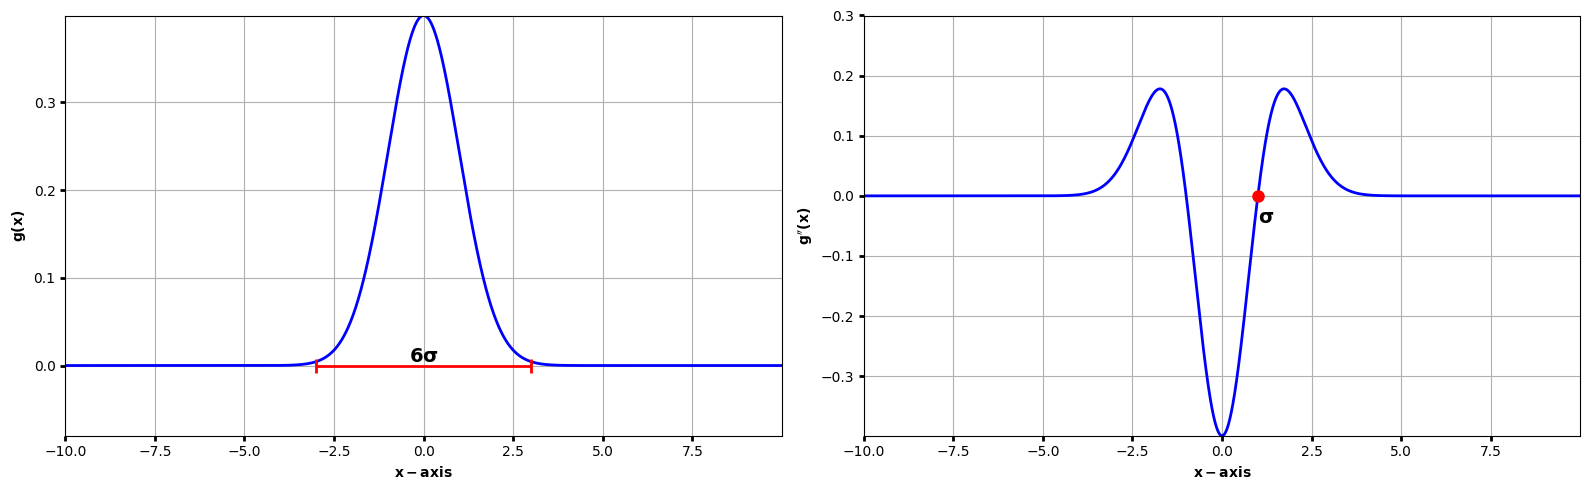

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Define variables
x = np.arange(-10, 10, 0.01)
sigma = 1
g = 1/(sigma*np.sqrt(2*np.pi))*np.exp(-1/2*((x)/sigma)**2)

# Second derivative
gpp = -1/(sigma*np.sqrt(2*np.pi))*(x**2/sigma**4-1/sigma**2)*np.exp(-1/2*((x)/sigma)**2)

# Adjusting the figure size and layout
plt.figure(figsize=(16, 5))

# Plotting g(x)
plt.subplot(1, 2, 1)
plt.plot(x, g, 'b', linewidth=2)
plt.errorbar(0, 0, xerr=3*sigma, fmt='r', lw=2, capsize=5, capthick=2, errorevery=1)
plt.text(0, 0, r'$\bf{6\sigma}$', fontsize=14, horizontalalignment='center', verticalalignment='bottom')
plt.grid(True)
plt.xlabel(r'$\bf{x-axis}$')
plt.ylabel(r'$\bf{g(x)}$')
plt.ylim([-0.08, max(g)])
plt.gca().tick_params(axis='both', which='major', labelsize=10, width=2)
plt.autoscale(enable=True, axis='x', tight=True)

# Corrected second derivative
gpp = -1/(sigma*np.sqrt(2*np.pi)*sigma**3)*(1-x**2/sigma**2)*np.exp(-1/2*((x)/sigma)**2)

# Plotting g''(x)
plt.subplot(1, 2, 2)
plt.plot(x, gpp, 'b', linewidth=2)
plt.plot(sigma, 0, 'or', markersize=8)
plt.text(sigma, -0.02, r'$\bf{\sigma}$', fontsize=14, horizontalalignment='left', verticalalignment='top')
plt.grid(True)
plt.xlabel(r'$\bf{x-axis}$')
plt.ylabel(r"$\bf{g''(x)}$")
plt.ylim([min(gpp), 0.3])
plt.gca().tick_params(axis='both', which='major', labelsize=10, width=2)
plt.autoscale(enable=True, axis='x', tight=True)

plt.tight_layout()
plt.show()

## Blob Filter (1D)

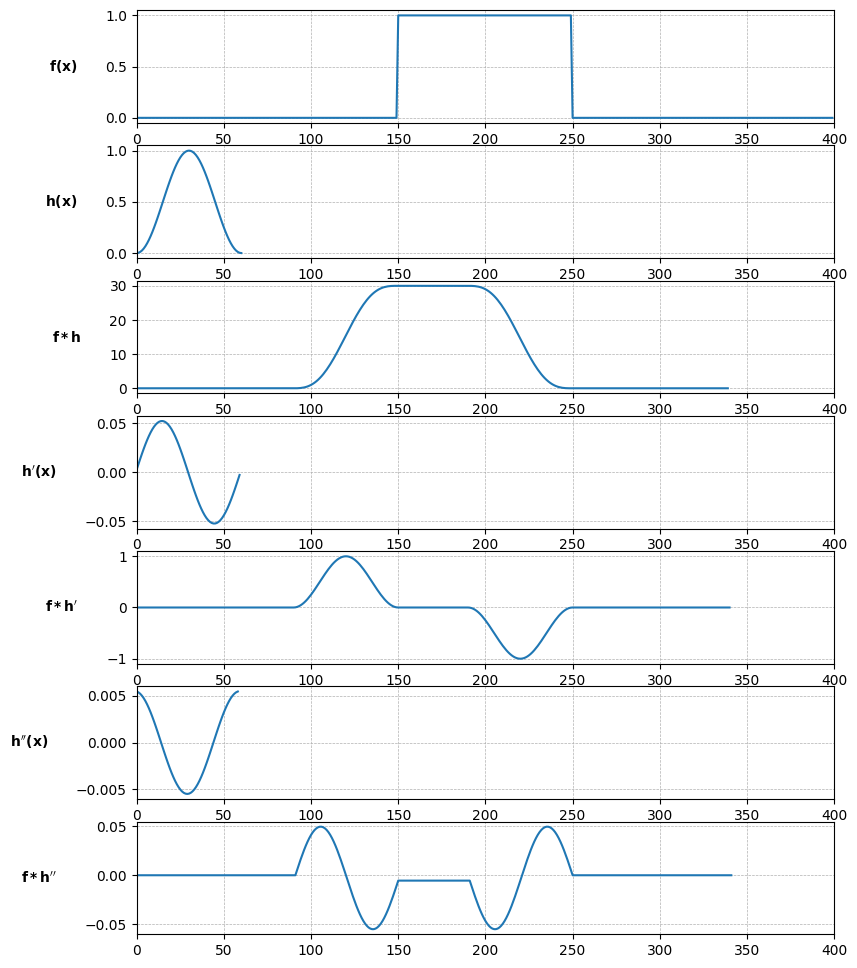

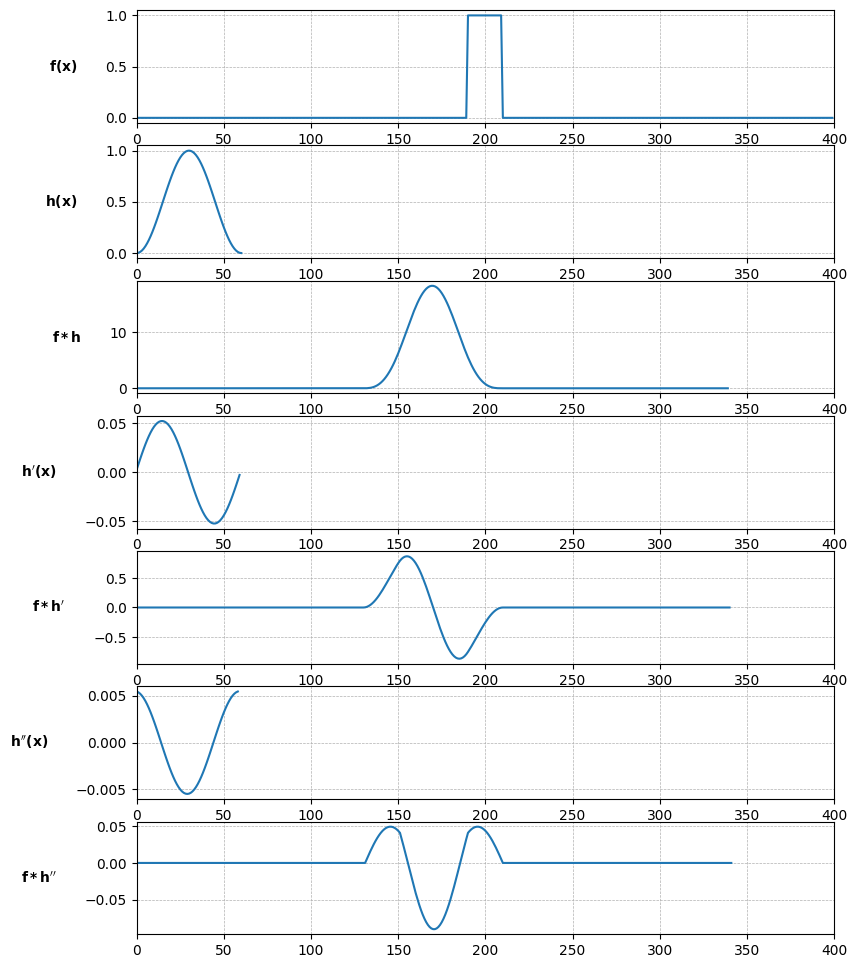

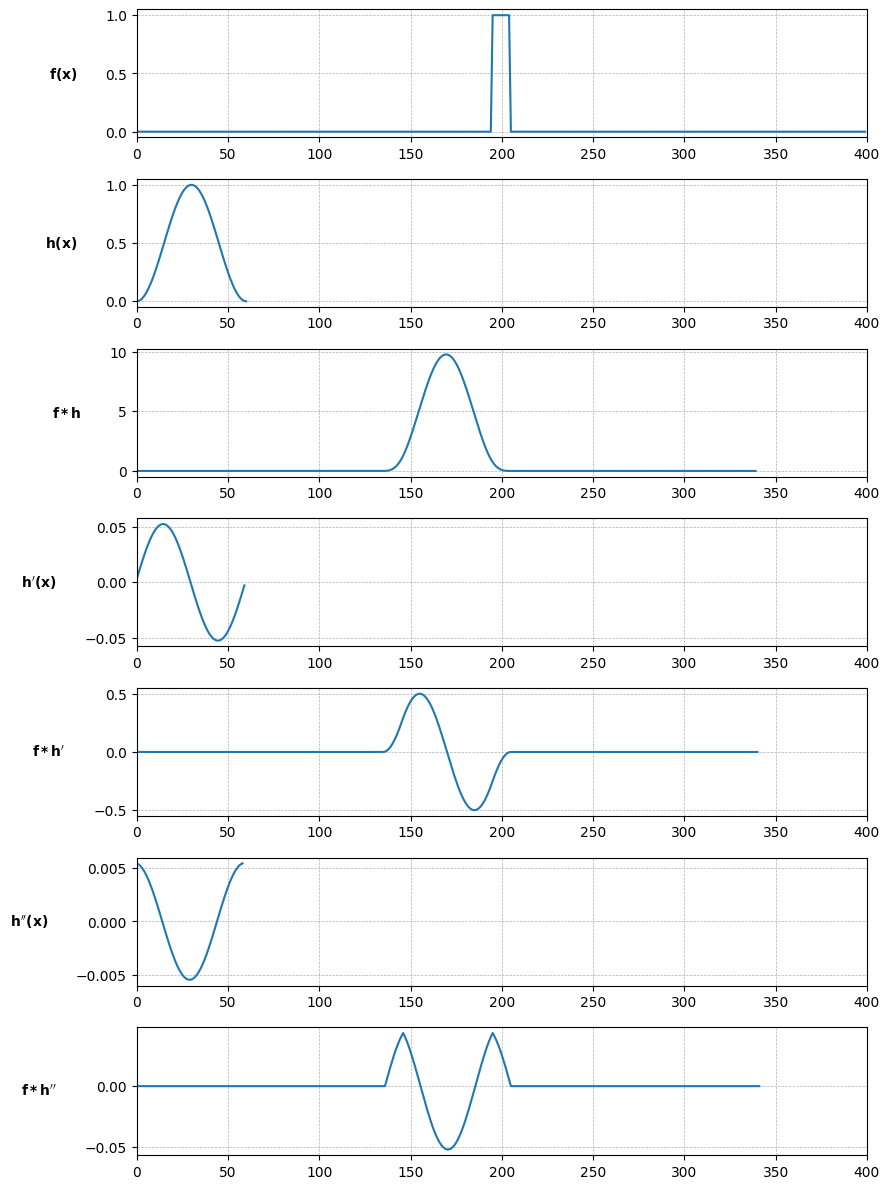

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 1D example with three different signal lengths
fig2, axs2 = plt.subplots(7, 1, figsize=(9, 12))
fig3, axs3 = plt.subplots(7, 1, figsize=(9, 12))
fig4, axs4 = plt.subplots(7, 1, figsize=(9, 12))

signals = {
    'fig2': np.zeros(400),
    'fig3': np.zeros(400),
    'fig4': np.zeros(400),
}

signals['fig2'][150:250] = 1
signals['fig3'][190:210] = 1
signals['fig4'][195:205] = 1

windSize = 61
h = np.hanning(windSize)

for fig_key, sig in signals.items():
    axs = eval(f"axs{fig_key[-1]}")
    # Original signal
    axs[0].plot(sig, linewidth=1.5)
    axs[0].set_ylabel(r'$\bf f(x)$', rotation=0, labelpad=20, horizontalalignment='right', verticalalignment='center')
    axs[0].grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
    axs[0].autoscale(enable=True, axis='x', tight=True)

    # Gaussian window
    h = np.hanning(windSize)
    axs[1].plot(h, linewidth=1.5)
    axs[1].set_ylabel(r'$\bf h(x)$', rotation=0, labelpad=20, horizontalalignment='right', verticalalignment='center')
    axs[1].grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
    axs[1].autoscale(enable=True, axis='x', tight=True)

    # Convolution of signal and window
    fh = np.convolve(sig, h, 'valid')
    axs[2].plot(fh, linewidth=1.5)
    axs[2].set_ylabel(r'$\bf f * h$', rotation=0, labelpad=20, horizontalalignment='right', verticalalignment='center')
    axs[2].grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
    axs[2].autoscale(enable=True, axis='x', tight=True)

    # First derivative of the window
    diff_h = np.diff(h)
    axs[3].plot(diff_h, linewidth=1.5)
    axs[3].set_ylabel(r"$\bf h'(x)$", rotation=0, labelpad=20, horizontalalignment='right', verticalalignment='center')
    axs[3].grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
    axs[3].autoscale(enable=True, axis='x', tight=True)

    # Convolution of signal and first derivative of window
    fh = np.convolve(sig, diff_h, 'valid')
    axs[4].plot(fh, linewidth=1.5)
    axs[4].set_ylabel(r"$\bf f * h'$", rotation=0, labelpad=20, horizontalalignment='right', verticalalignment='center')
    axs[4].grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
    axs[4].autoscale(enable=True, axis='x', tight=True)

    # Second derivative of the window
    diff_h2 = np.diff(diff_h)
    axs[5].plot(diff_h2, linewidth=1.5)
    axs[5].set_ylabel(r"$\bf h''(x)$", rotation=0, labelpad=20, horizontalalignment='right', verticalalignment='center')
    axs[5].grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
    axs[5].autoscale(enable=True, axis='x', tight=True)

    # Convolution of signal and second derivative of window
    fh2 = np.convolve(sig, diff_h2, 'valid')
    axs[6].plot(fh2, linewidth=1.5)
    axs[6].set_ylabel(r"$\bf f * h''$", rotation=0, labelpad=20, horizontalalignment='right', verticalalignment='center')
    axs[6].grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
    axs[6].autoscale(enable=True, axis='x', tight=True)

for ax in axs2:
    ax.set_xlim(0, len(signals['fig2']))
for ax in axs3:
    ax.set_xlim(0, len(signals['fig3']))
for ax in axs4:
    ax.set_xlim(0, len(signals['fig4']))

plt.tight_layout()
plt.show()


## Blob Filter (2D)

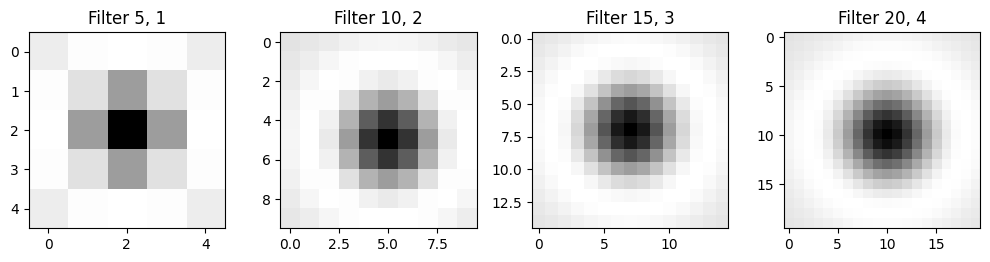

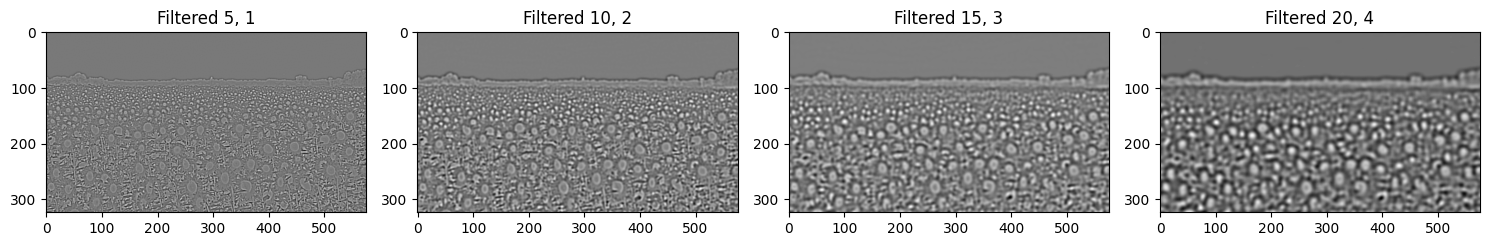

In [6]:
from PIL import Image
import matplotlib.pyplot as plt

from scipy.ndimage import gaussian_filter
from scipy.signal import convolve2d
import numpy as np

# Define a function to manually create a Laplacian of Gaussian filter
def log_filter(size, sigma):
    """Generate a Laplacian of Gaussian filter."""
    n = size
    y, x = np.ogrid[-n // 2 + 1:n // 2 + 1, -n // 2 + 1:n // 2 + 1]
    y_filter, x_filter = np.ogrid[-n // 2:n // 2 + 1, -n // 2:n // 2 + 1]
    h = np.exp(-(x_filter**2 + y_filter**2) / (2 * sigma**2))
    h = h * (x_filter**2 + y_filter**2 - 2 * sigma**2) / (sigma**4)
    h = h - h.mean()
    return h

# Generating the filters with different parameters as specified

img = Image.open('sunflower-832793_1920_gray.jpg')
img = img.resize((576, 324))

filters = [log_filter(size, sigma) for size, sigma in [(4, 1), (9, 2), (14, 3), (19, 4)]]

# Applying the filters to the synthetic image
filtered_images = [convolve2d(img, f, mode='same', boundary='symm') for f in filters]

# Display the generated LoG filters
fig1, axs1 = plt.subplots(1, 4, figsize=(10, 5))
for ax, f, param in zip(axs1, filters, [(5, 1), (10, 2), (15, 3), (20, 4)]):
    ax.imshow(f, cmap='gray')
    ax.set_title(f'Filter {param[0]}, {param[1]}')
plt.tight_layout()



# Display the images filtered by the LoG filters
fig2, axs2 = plt.subplots(1, 4, figsize=(15, 5))
for ax, fi, param in zip(axs2, filtered_images, [(5, 1), (10, 2), (15, 3), (20, 4)]):
    ax.imshow(fi, cmap='gray')
    ax.set_title(f'Filtered {param[0]}, {param[1]}')
plt.tight_layout()

plt.show()



## Comparison of DoG and LoG

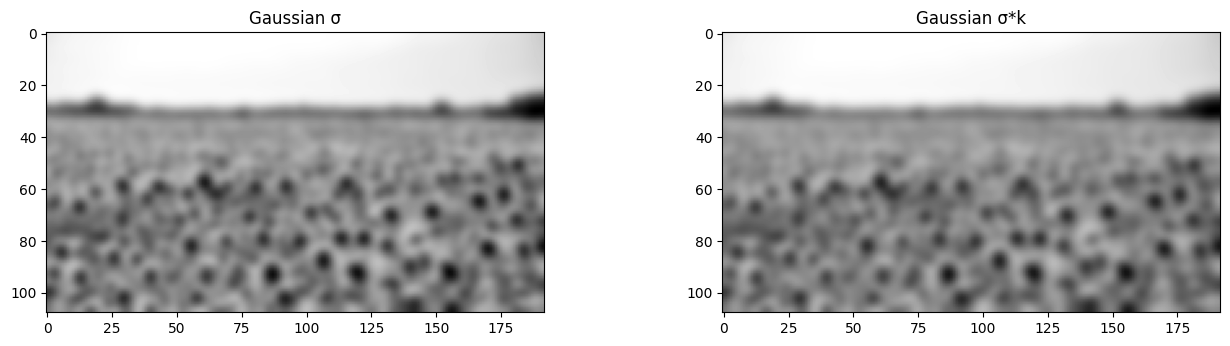

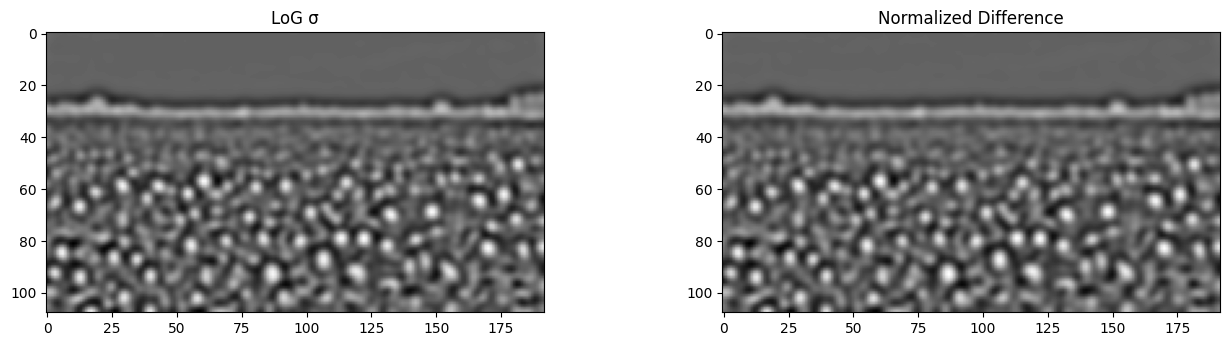

In [7]:
from PIL import Image
from scipy.ndimage import gaussian_filter, gaussian_laplace
from skimage import img_as_float, transform
import matplotlib.pyplot as plt
import numpy as np

# Parameters
sigma = 2
k = 1.1

# Adjusting the placeholder image for demonstration
# In a practical application, this would be replaced with an actual image load and resize operation.
img = Image.open('sunflower-832793_1920_gray.jpg')
img = img.resize((576, 324))

img = img_as_float(img)  # Simulating im2double
img_resized = transform.resize(img, (img.shape[0] // 3, img.shape[1] // 3))  # Simulating imresize

# Gaussian and LoG filters
h_gaussian1 = gaussian_filter(img_resized, sigma)
h_gaussian2 = gaussian_filter(img_resized, sigma*k)
h_log = gaussian_laplace(img_resized, sigma)

# The normalized difference calculation as specified in the MATLAB code
normalized_diff = (h_gaussian2 - h_gaussian1) / (sigma**2 * (k-1))

# Displaying the Gaussian filtered images
plt.figure(figsize=(16, 8))
plt.subplot(221)
plt.imshow(h_gaussian1, cmap='gray')
plt.title('Gaussian σ')

plt.subplot(222)
plt.imshow(h_gaussian2, cmap='gray')
plt.title('Gaussian σ*k')

# Displaying the LoG filtered image and the normalized difference image
plt.figure(figsize=(16, 8))
plt.subplot(221)
plt.imshow(h_log, cmap='gray')
plt.title('LoG σ')

plt.subplot(222)
plt.imshow(normalized_diff, cmap='gray')
plt.title('Normalized Difference')

plt.show()


## Laplacian of Gaussian (Filter Size)

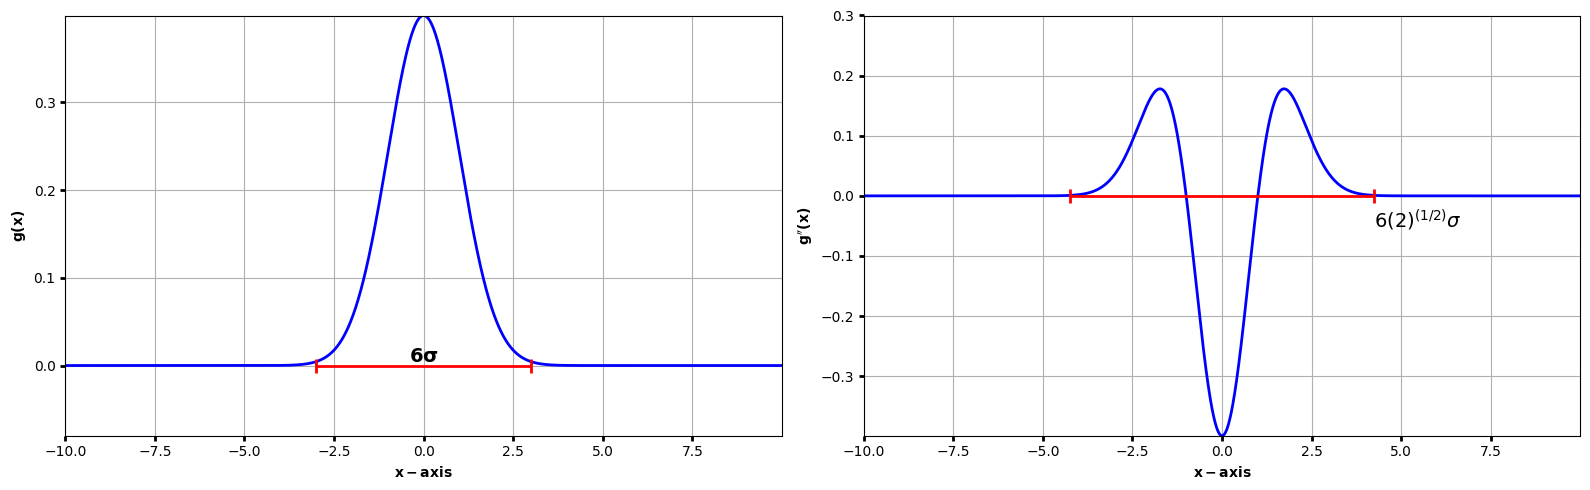

In [18]:
# Re-using the provided code with the correct adjustments and definitions
import matplotlib.pyplot as plt
import numpy as np

# Define variables
x = np.arange(-10, 10, 0.01)
sigma = 1
g = 1/(sigma*np.sqrt(2*np.pi))*np.exp(-1/2*((x)/sigma)**2)

# Second derivative
gpp = -1/(sigma*np.sqrt(2*np.pi))*(x**2/sigma**4-1/sigma**2)*np.exp(-1/2*((x)/sigma)**2)

# Adjusting the figure size and layout
plt.figure(figsize=(16, 5))

# Plotting g(x)
plt.subplot(1, 2, 1)
plt.plot(x, g, 'b', linewidth=2)
plt.errorbar(0, 0, xerr=3*sigma, fmt='r', lw=2, capsize=5, capthick=2, errorevery=1)
plt.text(0, 0, r'$\bf{6\sigma}$', fontsize=14, horizontalalignment='center', verticalalignment='bottom')
plt.grid(True)
plt.xlabel(r'$\bf{x-axis}$')
plt.ylabel(r'$\bf{g(x)}$')
plt.ylim([-0.08, max(g)])
plt.gca().tick_params(axis='both', which='major', labelsize=10, width=2)
plt.autoscale(enable=True, axis='x', tight=True)

# Corrected second derivative
gpp = -1/(sigma*np.sqrt(2*np.pi)*sigma**3)*(1-x**2/sigma**2)*np.exp(-1/2*((x)/sigma)**2)

# Plotting g''(x)
plt.subplot(1, 2, 2)
plt.plot(x, gpp, 'b', linewidth=2)
plt.errorbar(0, 0, xerr=3*np.sqrt(2)*sigma, fmt='r', lw=2, capsize=5, capthick=2, errorevery=1)
plt.text(3*np.sqrt(2)*sigma, -0.02, r'$6(2)^{(1/2)} \sigma$', fontsize=14, horizontalalignment='left', verticalalignment='top')
plt.grid(True)
plt.xlabel(r'$\bf{x-axis}$')
plt.ylabel(r"$\bf{g''(x)}$")
plt.ylim([min(gpp), 0.3])
plt.gca().tick_params(axis='both', which='major', labelsize=10, width=2)
plt.autoscale(enable=True, axis='x', tight=True)

plt.tight_layout()
plt.show()


## Separable Filter

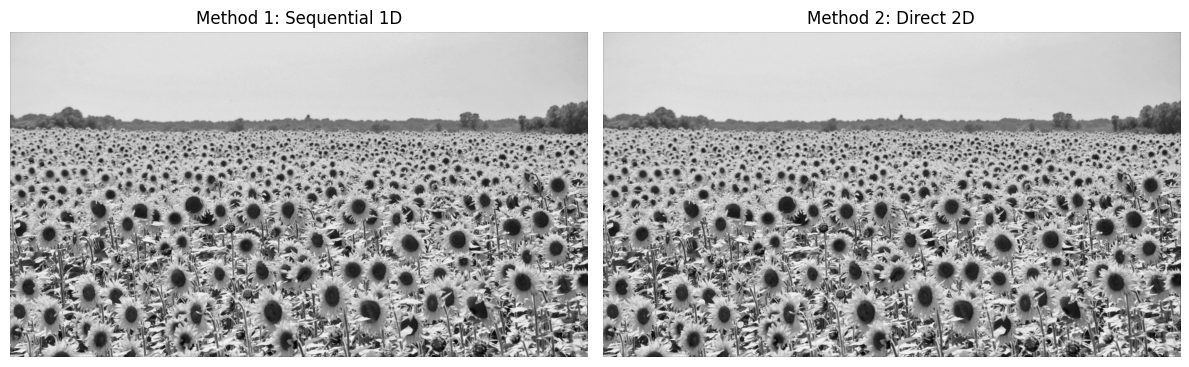

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, convolve
import time

# Define Gaussian filters
def fspecial_gaussian(shape, sigma=1):
    m, n = [(ss-1.)/2. for ss in shape]
    y, x = np.ogrid[-m:m+1, -n:n+1]
    h = np.exp(-(x*x + y*y) / (2.*sigma*sigma))
    h[h < np.finfo(h.dtype).eps*h.max()] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

# Load image
img = plt.imread('sunflower-832793_1920_gray.jpg')

# Gaussian filters
gx = fspecial_gaussian([3, 1], 1)
gy = fspecial_gaussian([1, 3], 1)
Gxy = fspecial_gaussian([3, 3], 1)


img_c1 = convolve(convolve(img, gx, mode='constant'), gy, mode='constant')
img_c2 = convolve(img, Gxy, mode='constant')

# Display results
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(img_c1 / np.max(img_c1), cmap='gray')
plt.title(f'Method 1: Sequential 1D')
plt.axis('off')

plt.subplot(122)
plt.imshow(img_c2 / np.max(img_c2), cmap='gray')
plt.title(f'Method 2: Direct 2D')
plt.axis('off')

plt.tight_layout()
plt.show()


## Difference of Gaussian

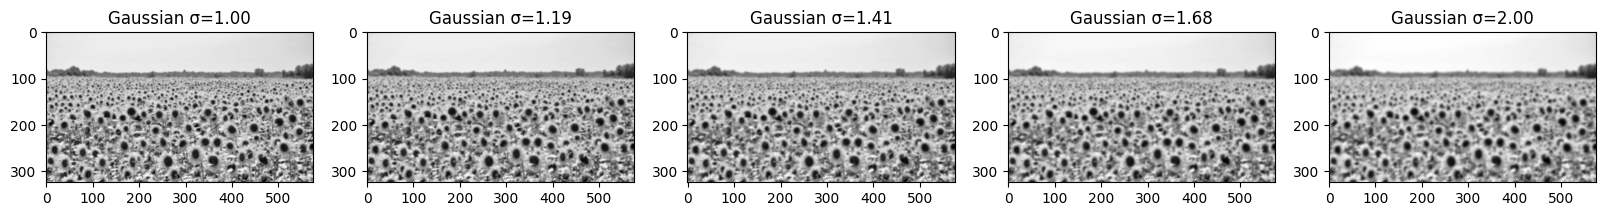

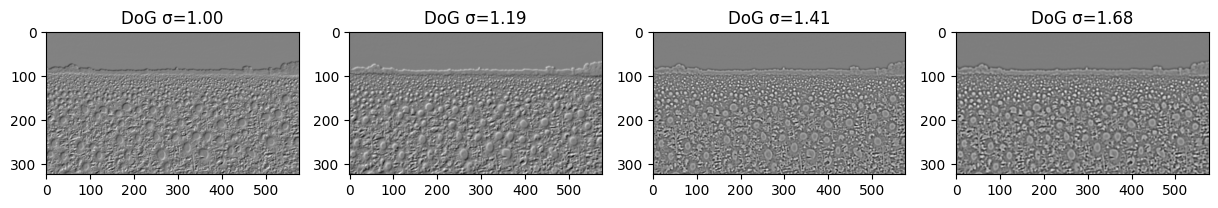

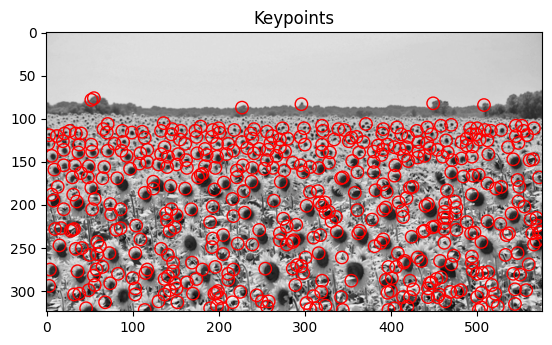

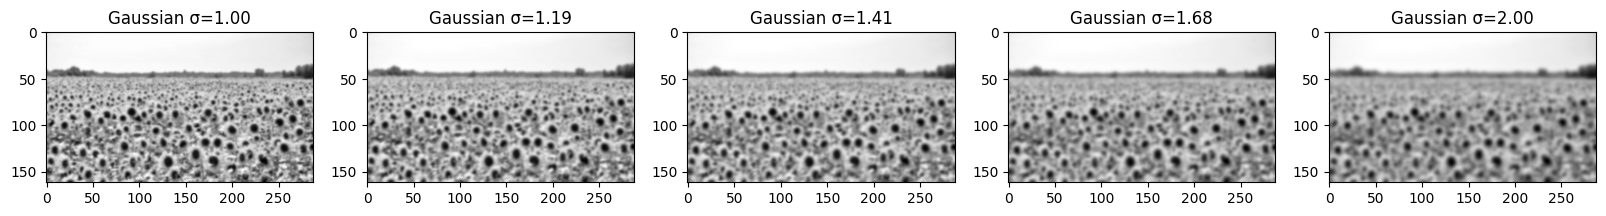

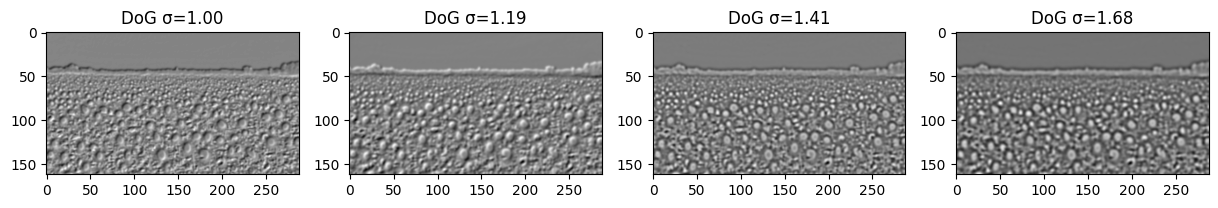

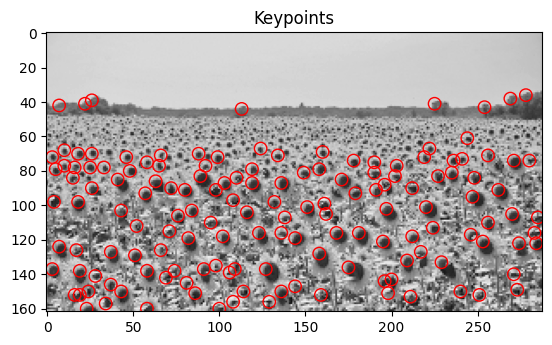

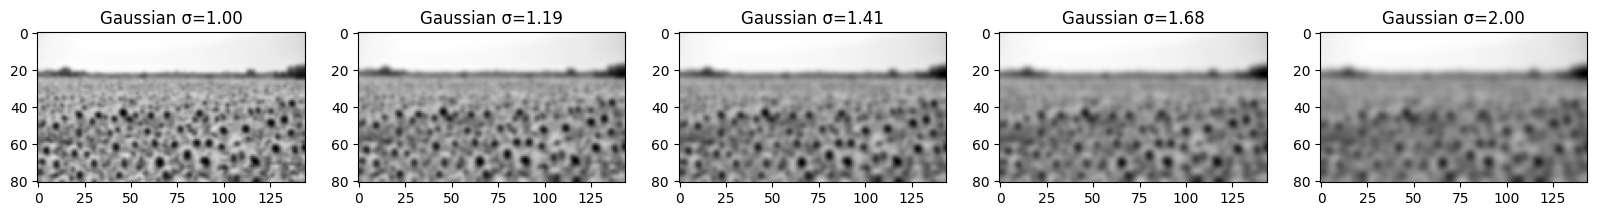

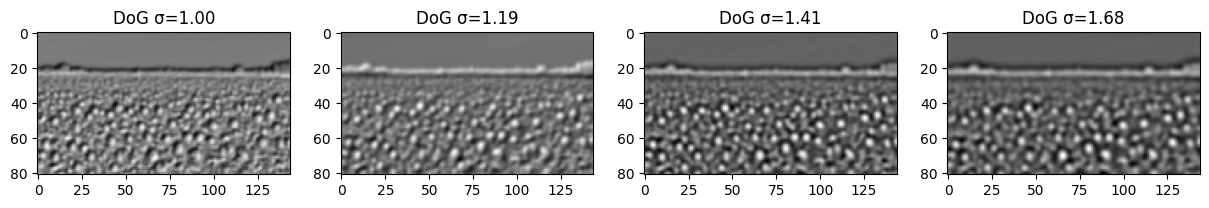

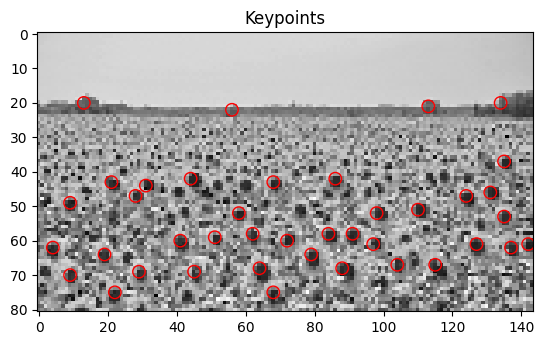

In [57]:
from PIL import Image

import numpy as np
import cv2
from skimage import feature
import matplotlib.pyplot as plt

img = Image.open('sunflower-832793_1920_gray.jpg')
img = img.resize((576, 324))
img = np.array(img)/255

sigma0 = 1.6
s = 4
octave = 3
contra_thrs = 0.08

# Generate Gaussian filters and apply
sigma = 2 ** (np.arange(s + 1) / s) 
filters = [cv2.getGaussianKernel(int(6 * sig), sig) for sig in sigma]

# Process each octave
for o in range(octave):
    if o > 0:
        # Downsample image for next octave
        img = cv2.resize(img, (0, 0), fx=0.5, fy=0.5, interpolation=cv2.INTER_CUBIC)
    
    # Apply Gaussian filters
    img_g = np.zeros((img.shape[0], img.shape[1], len(sigma)))
    for i, filt in enumerate(filters):
        img_g[:, :, i] = cv2.filter2D(img, -1, filt @ filt.T)
    
    # Compute DoG images
    img_dog = np.diff(img_g, axis=2)
    
    # Detect keypoints in DoG images
    keypoints = []
    for i in range(1, img_dog.shape[2] - 1):
        dog_images = img_dog[:, :, i - 1:i + 2]
        local_maxima = feature.peak_local_max(dog_images,  min_distance=1, threshold_abs=contra_thrs, exclude_border=True)
        keypoints.extend(local_maxima)
    
    # Plot Gaussian and DoG images
    fig, ax = plt.subplots(1, len(sigma), figsize=(20, 5))
    for i in range(len(sigma)):
        ax[i].imshow(img_g[:, :, i], cmap='gray')
        ax[i].set_title(f'Gaussian σ={sigma[i]:.2f}')
    plt.show()

    fig, ax = plt.subplots(1, len(sigma)-1, figsize=(15, 5))
    for i in range(len(sigma)-1):
        ax[i].imshow(img_dog[:, :, i], cmap='gray')
        ax[i].set_title(f'DoG σ={sigma[i]:.2f}')
    plt.show()

    # Plot keypoints
    plt.imshow(img, cmap='gray')
    for kp in keypoints:
        plt.scatter(kp[1], kp[0], s=80, facecolors='none', edgecolor='r')  # Set color to red, remove edgecolor
    plt.title('Keypoints')
    plt.show()


## Orientation Normalization

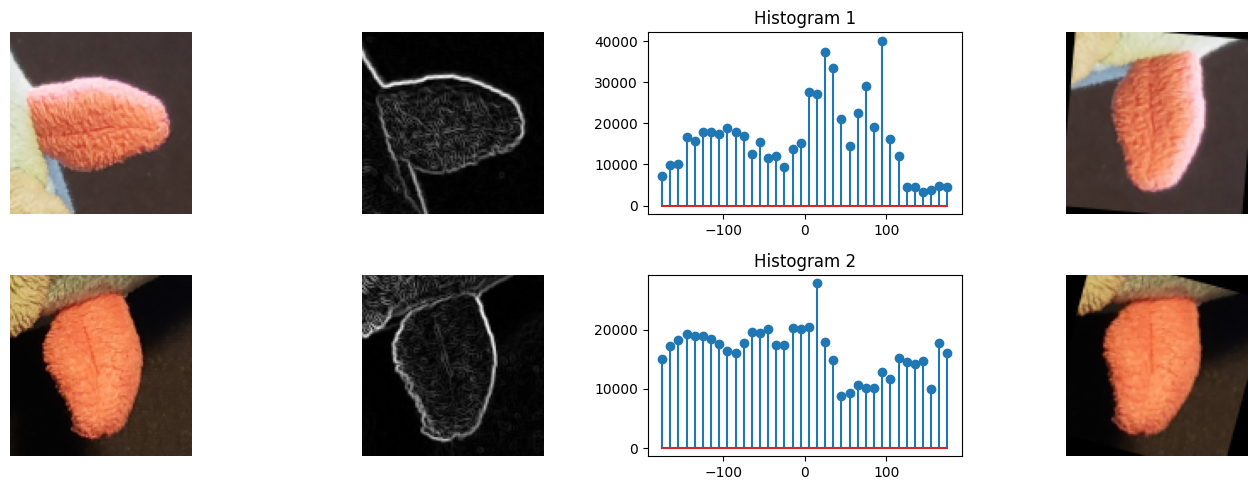

In [84]:
import numpy as np
import cv2
from matplotlib.image import imread
from scipy.ndimage import zoom
from scipy.signal import convolve2d

def mat2gray(image):
    # Normalize the image to be in the range [0, 1]
    min_val = np.min(image)
    max_val = np.max(image)
    norm_image = (image - min_val) / (max_val - min_val)
    return norm_image

def resize_image(image, scale):
    # Using cv2.resize for more control over resizing
    # Alternatively, scipy's zoom can be used for fractional zooming
    height, width = image.shape[:2]
    return cv2.resize(image, (0,0), fx=scale, fy=scale, interpolation=cv2.INTER_AREA)

def calculate_gradient(image):
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # Calculate gradients along the x and y axis
    gx = convolve2d(gray_image, np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]), mode='valid')
    gy = convolve2d(gray_image, np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]), mode='valid')
    # Calculate the gradient magnitude and direction
    gmag = np.sqrt(gx**2 + gy**2)
    gdir = np.arctan2(gy, gx) * (180 / np.pi) # Convert from radians to degrees
    return gmag, gdir

def compute_histogram(gmag, gdir):
    bins = np.arange(-180, 181, 10) # 36 bins
    hist_count = np.zeros(36)
    bin_indices = np.digitize(gdir.flatten(), bins) - 1 # Adjust indices
    for i in range(36):
        hist_count[i] = np.sum(gmag.flatten()[bin_indices == i])
    return hist_count

# Assuming patch1 and patch2 are the file paths to your images
patch1 = '20201226_200728_patch2.jpg'
patch2 = '20201226_200735_patch2.jpg'

imgPatch1 = resize_image(imread(patch1), 0.3)
gmag1, gdir1 = calculate_gradient(imgPatch1)

imgPatch2 = resize_image(imread(patch2), 0.3)
gmag2, gdir2 = calculate_gradient(imgPatch2)

hist_count1 = compute_histogram(gmag1, gdir1)
hist_count2 = compute_histogram(gmag2, gdir2)

edges = np.arange(-175, 180, 10) # These are the edges of the bins

# Create a large figure to accommodate the subplots
plt.figure(figsize=(14, 5))

# Display imgPatch1
plt.subplot(241)
plt.imshow(imgPatch1)
plt.axis('off')  # Hide axis

# Display normalized gradient magnitude for imgPatch1
plt.subplot(242)
plt.imshow(mat2gray(gmag1), cmap='gray')
plt.axis('off')

# Histogram of gradient directions for imgPatch1
plt.subplot(243)
plt.stem(edges, hist_count1)
plt.title('Histogram 1')

# Rotate imgPatch1 based on the dominant orientation
I1 = np.argmax(hist_count1)
angle1 = -edges[I1]
M1 = cv2.getRotationMatrix2D((imgPatch1.shape[1] // 2, imgPatch1.shape[0] // 2), angle1, 1)
rotated_img1 = cv2.warpAffine(imgPatch1, M1, (imgPatch1.shape[1], imgPatch1.shape[0]))

plt.subplot(244)
plt.imshow(rotated_img1)
plt.axis('off')

# Display imgPatch2
plt.subplot(245)
plt.imshow(imgPatch2)
plt.axis('off')

# Display normalized gradient magnitude for imgPatch2
plt.subplot(246)
plt.imshow(mat2gray(gmag2), cmap='gray')
plt.axis('off')

# Histogram of gradient directions for imgPatch2
plt.subplot(247)
plt.stem(edges, hist_count2)
plt.title('Histogram 2')

# Rotate imgPatch2 based on the dominant orientation
I2 = np.argmax(hist_count2)
angle2 = -edges[I2]
M2 = cv2.getRotationMatrix2D((imgPatch2.shape[1] // 2, imgPatch2.shape[0] // 2), angle2, 1)
rotated_img2 = cv2.warpAffine(imgPatch2, M2, (imgPatch2.shape[1], imgPatch2.shape[0]))

plt.subplot(248)
plt.imshow(rotated_img2)
plt.axis('off')

plt.tight_layout()
plt.show()


## Intensity Invariant

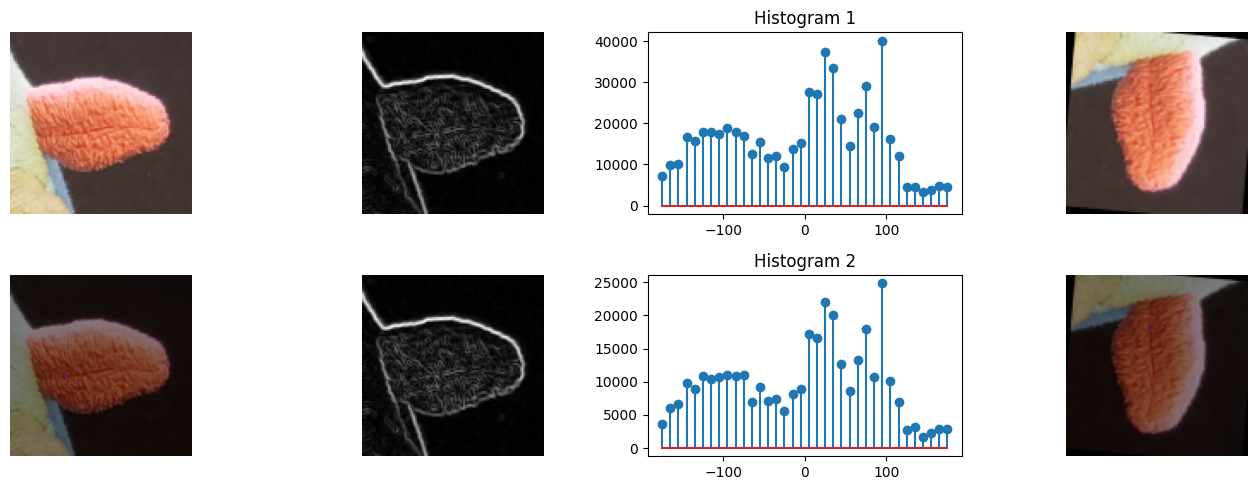

In [96]:
import numpy as np
import cv2
from matplotlib.image import imread
from scipy.ndimage import zoom
from scipy.signal import convolve2d

def mat2gray(image):
    # Normalize the image to be in the range [0, 1]
    min_val = np.min(image)
    max_val = np.max(image)
    norm_image = (image - min_val) / (max_val - min_val)
    return norm_image

def resize_image(image, scale):
    # Using cv2.resize for more control over resizing
    # Alternatively, scipy's zoom can be used for fractional zooming
    height, width = image.shape[:2]
    return cv2.resize(image, (0,0), fx=scale, fy=scale, interpolation=cv2.INTER_AREA)

def calculate_gradient(image):
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # Calculate gradients along the x and y axis
    gx = convolve2d(gray_image, np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]), mode='valid')
    gy = convolve2d(gray_image, np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]), mode='valid')
    # Calculate the gradient magnitude and direction
    gmag = np.sqrt(gx**2 + gy**2)
    gdir = np.arctan2(gy, gx) * (180 / np.pi) # Convert from radians to degrees
    return gmag, gdir

def compute_histogram(gmag, gdir):
    bins = np.arange(-180, 181, 10) # 36 bins
    hist_count = np.zeros(36)
    bin_indices = np.digitize(gdir.flatten(), bins) - 1 # Adjust indices
    for i in range(36):
        hist_count[i] = np.sum(gmag.flatten()[bin_indices == i])
    return hist_count

# Assuming patch1 and patch2 are the file paths to your images
patch1 = '20201226_200728_patch2.jpg'

imgPatch1 = resize_image(imread(patch1), 0.3)
gmag1, gdir1 = calculate_gradient(imgPatch1)

imgPatch2 = (imgPatch1 *0.6 - 20).astype(np.uint8)
gmag2, gdir2 = calculate_gradient(imgPatch2)

hist_count1 = compute_histogram(gmag1, gdir1)
hist_count2 = compute_histogram(gmag2, gdir2)

edges = np.arange(-175, 180, 10) # These are the edges of the bins

# Create a large figure to accommodate the subplots
plt.figure(figsize=(14, 5))

# Display imgPatch1
plt.subplot(241)
plt.imshow(imgPatch1)
plt.axis('off')  # Hide axis

# Display normalized gradient magnitude for imgPatch1
plt.subplot(242)
plt.imshow(mat2gray(gmag1), cmap='gray')
plt.axis('off')

# Histogram of gradient directions for imgPatch1
plt.subplot(243)
plt.stem(edges, hist_count1)
plt.title('Histogram 1')

# Rotate imgPatch1 based on the dominant orientation
I1 = np.argmax(hist_count1)
angle1 = -edges[I1]
M1 = cv2.getRotationMatrix2D((imgPatch1.shape[1] // 2, imgPatch1.shape[0] // 2), angle1, 1)
rotated_img1 = cv2.warpAffine(imgPatch1, M1, (imgPatch1.shape[1], imgPatch1.shape[0]))

plt.subplot(244)
plt.imshow(rotated_img1)
plt.axis('off')

# Display imgPatch2
plt.subplot(245)
plt.imshow(imgPatch2)
plt.axis('off')

# Display normalized gradient magnitude for imgPatch2
plt.subplot(246)
plt.imshow(mat2gray(gmag2), cmap='gray')
plt.axis('off')

# Histogram of gradient directions for imgPatch2
plt.subplot(247)
plt.stem(edges, hist_count2)
plt.title('Histogram 2')

# Rotate imgPatch2 based on the dominant orientation
I2 = np.argmax(hist_count2)
angle2 = -edges[I2]
M2 = cv2.getRotationMatrix2D((imgPatch2.shape[1] // 2, imgPatch2.shape[0] // 2), angle2, 1)
rotated_img2 = cv2.warpAffine(imgPatch2, M2, (imgPatch2.shape[1], imgPatch2.shape[0]))

plt.subplot(248)
plt.imshow(rotated_img2)
plt.axis('off')

plt.tight_layout()
plt.show()
